# <span style="color:green"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:red"><center>Distribución Normal Multivariada</center></span>

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co






# **<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

Recordando un poco de lo que vimos en [Distribuciones continuas](../../Matematicas-Estadistica/Cuadernos/Prob_Distribuciones_continuas.ipynb#Distribución-normal), ya hemos hablado sobre la distribución normal y sus implicaciones. 

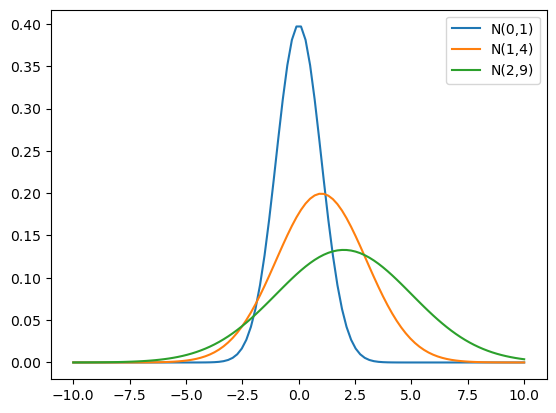

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import math

means = [0,1,2]
vars = [1,4,9]

x = np.linspace(-10, 10, num=100)
for m,s in zip(means,vars):
    pdf = norm.pdf(x, m, math.sqrt(s))
    plt.plot(x,pdf, label="N({},{})".format(m,s))
    plt.legend()
    

In [2]:
from ipywidgets import interactive

# Simulación de datos

def simular_normal(m=0,v=0):
    # Elije una semilla
    np.random.seed(22)

    # Generamos datos
    x=np.linspace(-10,10,100)
    pdf = norm.pdf(x, m, math.sqrt(v))

    plt.figure(figsize=(8,5))
    plt.plot(x,pdf)
    plt.ylim([0,.45])
    plt.show()
    return x

interactive_plot = interactive(simular_normal, v=(1, 9,0.1), m = (-10.,10.))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

Esta versión que conocemos en realidad es un caso "univariado" de la que llamamos la "Distribución Normal Multivariada". Esta representa la distribución de una variable aleatoria multivariada o "Vector Aleatorio": Un vector o lista de varias variables aleatorias que pueden o no tener una correlación entre ellas.

Lo más importante de esta nueva distribución son los parámetros. En el caso univariado, teníamos dos escalares como parametros de media y varianza. En la generalización multivariada, la media $\mathbf{\mu}$ es un **vector**, donde cada elemento es la media de cada variable aleatoria, y la varianza $\Sigma$ es una **matríz**, que representa las covarianzas entre las variables aleatorias


La probabilidad conjunta de esta distribución es la siguiente
$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

donde $d$ es el "rango" de la matriz de covarianzas

Hagamos el ejemplo más "basico", la distribución multivariada estándar

\begin{align}
    \mathbf{\mu_1} = 
    \begin{bmatrix}
        0 \\
        0
    \end{bmatrix}
    \mathbf{\Sigma_1} = 
    \begin{bmatrix}
        1 & 0\\
        0 & 1
    \end{bmatrix}\\
\end{align} 

In [3]:
from scipy.stats import multivariate_normal 

m1 = np.array([0,0])
S1 = np.array([[1,0], [0,1]])

Notemos primero el comportamiento de esta función si se usa una distribución univariada

[1.48671951e-06 2.43896075e-06 3.96129909e-06 6.36982518e-06
 1.01408521e-05 1.59837411e-05 2.49424713e-05 3.85351967e-05
 5.89430678e-05 8.92616572e-05]


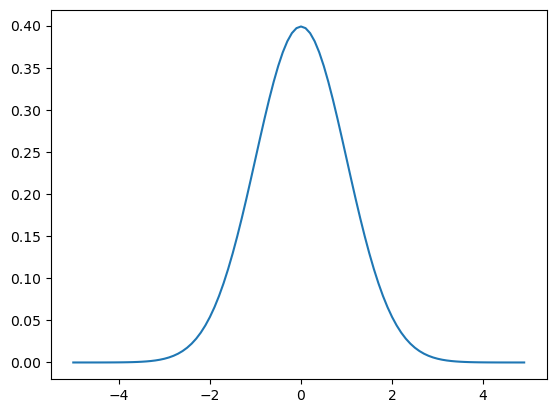

In [4]:
x = np.linspace(-5, 5, 100, endpoint=False)

pdf = multivariate_normal.pdf(x, m1[0], S1[0,0])

print(pdf[0:10])

plt.plot(x, pdf)

In [5]:
y = np.linspace(-5, 5, 100, endpoint=False)
X, Y = np.meshgrid(x,y)

multi_norm = multivariate_normal(cov = S1, mean = m1,
                                seed = 13)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = multi_norm.pdf([X[i,j], Y[i,j]])

[]

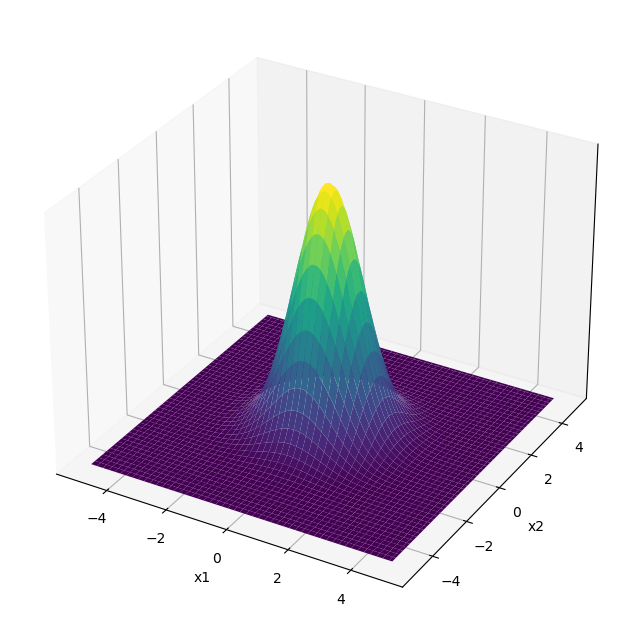

In [6]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')
plt.xlabel("x1")
plt.ylabel("x2")
ax.axes.zaxis.set_ticks([])

(100, 100)


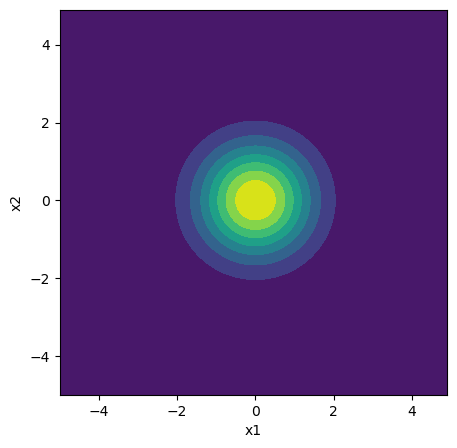

In [9]:
plt.figure(figsize=(5,5))
plt.contourf(X, Y, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
print(pdf.shape)

In [8]:
def simular_multi_norm(m1=0, m2=0, v1=1,v2=1,cov=0):
    x = np.linspace(-6, 6, 100, endpoint=False)
    y = np.linspace(-6, 6, 100, endpoint=False)
    X, Y = np.meshgrid(x,y)
    
    S = np.array([[v1, cov], 
                  [cov, v2]])
    m = np.array([m1, m2])

    multi_norm = multivariate_normal(cov = S, mean = m)

    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = multi_norm.pdf([X[i,j], Y[i,j]])
    fig = plt.figure(figsize=(5,5))
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
    # Create the Axes.
    ax = fig.add_subplot(gs[1, 0])
    
    ax_distx = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_disty = fig.add_subplot(gs[1, 1], sharey=ax)

    
    ax_distx.plot(x, norm.pdf(x, m1, math.sqrt(v1)))
    ax_disty.plot(norm.pdf(y, m2, math.sqrt(v2)), y)
    ax.contourf(X, Y, pdf, cmap='viridis')
    ax_distx.tick_params(axis="x", labelbottom=False)
    ax_disty.tick_params(axis="y", labelleft=False)

    return X, Y

interactive_plot = interactive(simular_multi_norm, cov=(-.9, .9,0.1),
                               m1=(-5.,5.), m2=(-5.,5.),
                               v1=(1,9,0.2), v2=(1,9,0.2))

interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m1', max=5.0, min=-5.0), FloatSlider(value=0.0, desc…